<a href="https://colab.research.google.com/github/sugi-san/first-order-model/blob/master/220316_FOMM_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Order Motion Model DEMO

In [ ]:
#@title **1.セットアップ**

# github からコードを取得
!git clone https://github.com/sugi-san/first-order-model.git
%cd first-order-model

# 学習済みパラメータのダウンロード
! pip install --upgrade gdown
import gdown
gdown.download('https://drive.google.com/uc?id=1eS9u8vWDWmjLmBmLsIimlbY8Sg7FQ0aK', 'vox-cpk.pth.tar', quiet=False)

# ランドマークデータのダウンロード
! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
! bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 関数定義
from function import *

# downloadフォルダ作成
import os
os.makedirs('examples/download')

Cloning into 'first-order-model'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 430 (delta 17), reused 0 (delta 0), pack-reused 372
Receiving objects: 100% (430/430), 96.86 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/first-order-model
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=8c67c1c1f5c000ead68ff740bff5561599847a69c6ee418a6a454709d6ae8e34
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


Downloading...
From: https://drive.google.com/uc?id=1eS9u8vWDWmjLmBmLsIimlbY8Sg7FQ0aK
To: /content/first-order-model/vox-cpk.pth.tar
100%|██████████| 729M/729M [00:06<00:00, 112MB/s] 


--2022-03-17 00:19:23--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.7MB/s    in 5.2s    

2022-03-17 00:19:29 (11.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



=== source ===


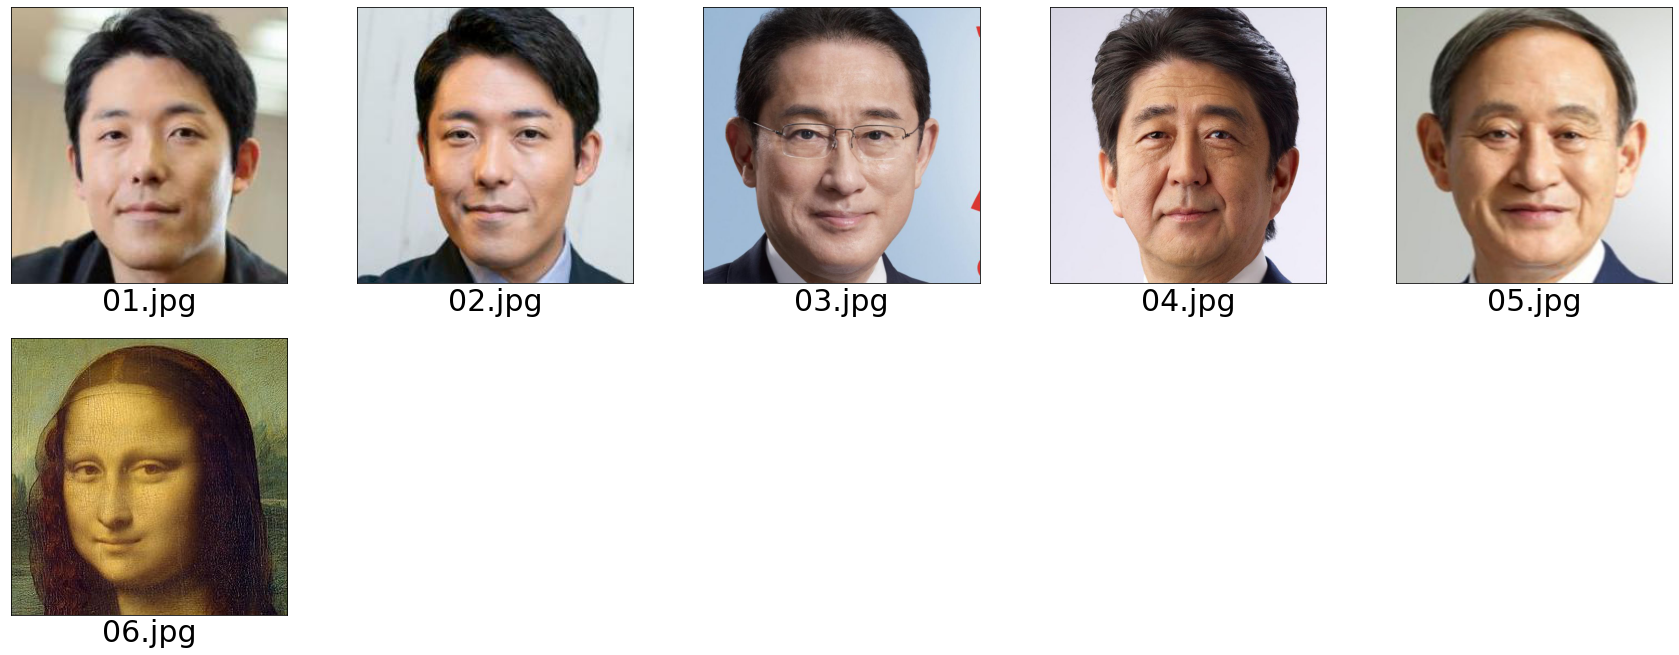

=== video ===


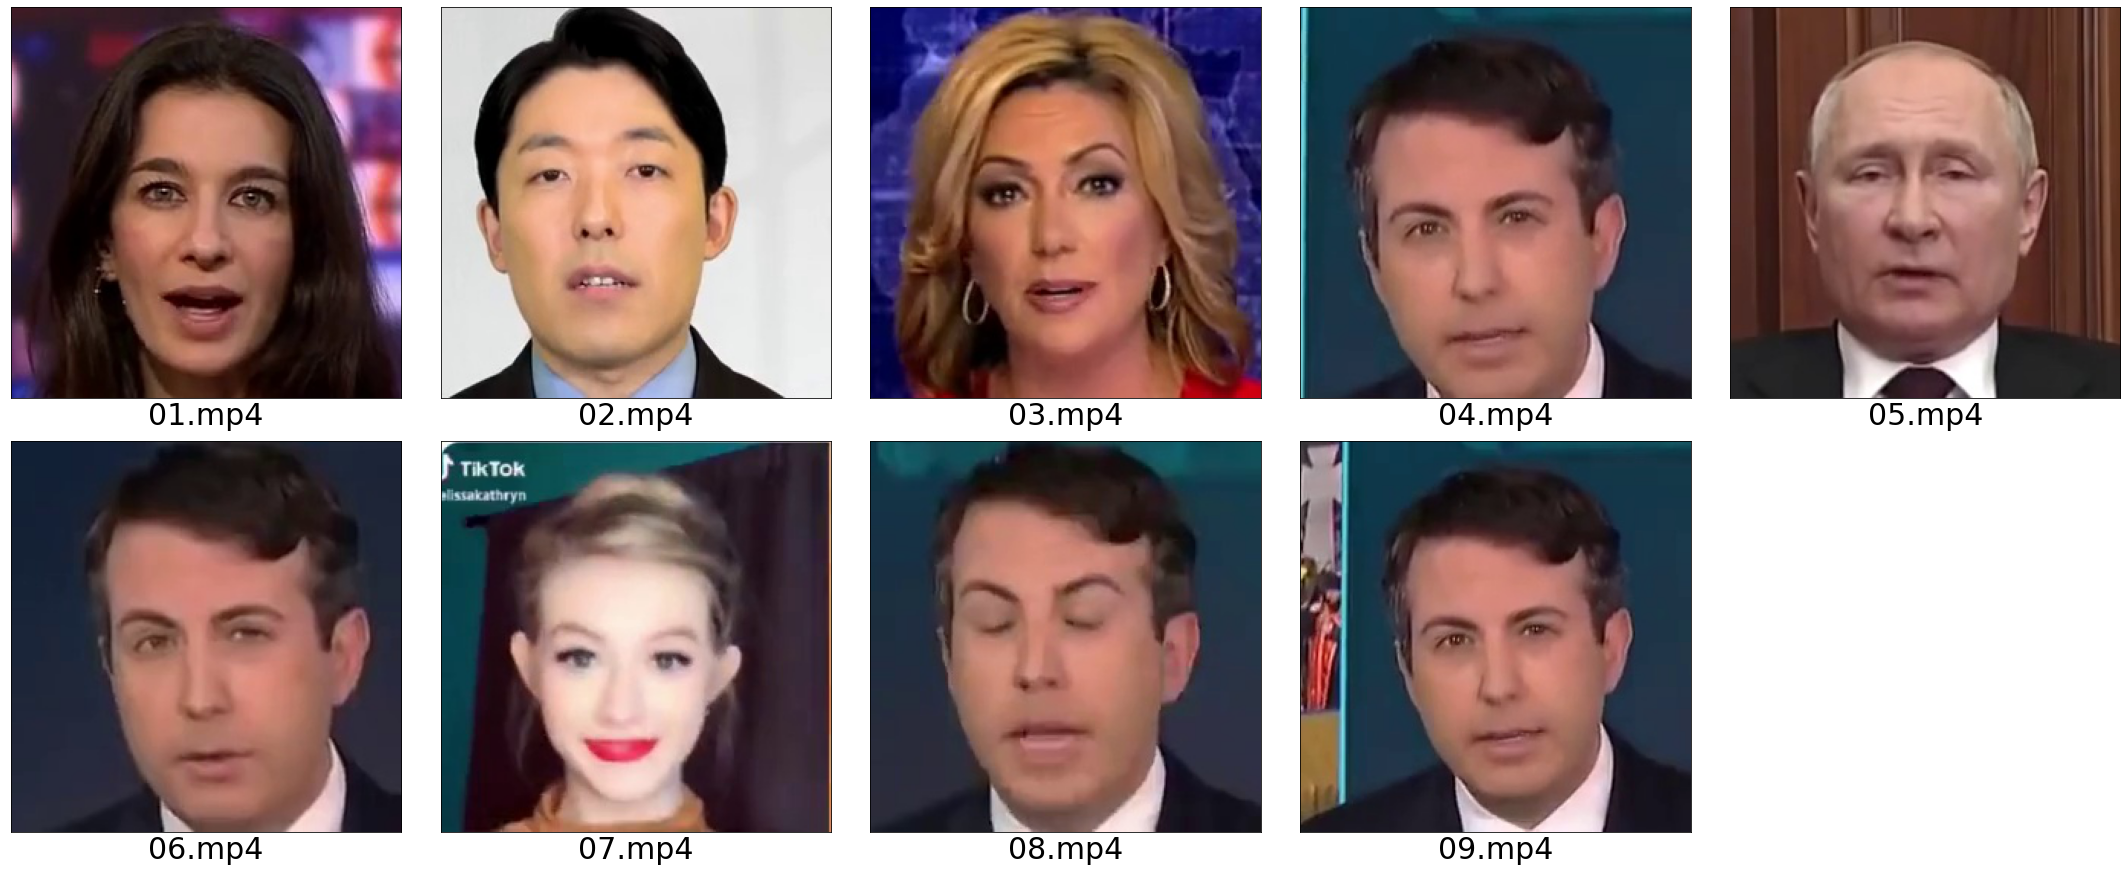

In [ ]:
#@title **2.ソースとビデオの表示**

# --- 画像表示 ---
print('=== source ===')
display_pic('examples/source')

# --- 動画表示 ---
print('=== video ===')
reset_folder('examples/pic_video')
import glob
files = sorted(glob.glob('examples/video/*.mp4'))
names = []
for file in files:
  name = os.path.basename(file)
  save_frame(name, 'examples/video', 'examples/pic_video')
  names.append(name)
display_movie('examples/pic_video', names)


In [ ]:
#@title **3.動画の作成** 

import imageio
import numpy as np
import matplotlib.animation as animation
from skimage.transform import resize
import warnings
warnings.filterwarnings("ignore")

from demo import load_checkpoints
from demo import make_animation
from skimage import img_as_ubyte

source = '06.jpg' #@param {"type": "string"}
video = '02.mp4' #@param {"type": "string"}

source_image = imageio.imread('./examples/source/'+source)
driving_video = imageio.mimread('./examples/video/'+video)

#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]


generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='vox-cpk.pth.tar')

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)
#HTML(display(source_image, driving_video, predictions).to_html5_video())

import cv2
import numpy as np

reset_folder('images')

for i in range(len(predictions)):
    source_img = (source_image * 255).astype(np.uint8)
    drive = (driving_video[i] * 255).astype(np.uint8)
    predict = (predictions[i] * 255).astype(np.uint8)
    tmp = cv2.hconcat([source_img, drive])
    img = cv2.hconcat([tmp, predict])
    imageio.imwrite('images/'+str(i).zfill(6)+'.jpg', img)

# フレームレート取得
video_file = './examples/video/'+video
cap = cv2.VideoCapture(video_file)
fps = cap.get(cv2.CAP_PROP_FPS)

# 動画作成
print('making movie...')
! ffmpeg -y -r $fps -i images/%06d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4

# 音声抽出・付加
print('preparation for sound...')
! ffmpeg -y -i $video_file -loglevel error sound.mp3
! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4

# 画像の再生
display_mp4('output.mp4')

100%|██████████| 502/502 [00:22<00:00, 22.13it/s]


making movie...
preparation for sound...


In [ ]:
#@title **4.動画のダウンロード**
import shutil
source_name = os.path.splitext(source)
video_name = os.path.splitext(video)
download_name = 'examples/download/'+source_name[0]+'_'+video_name[0]+'.mp4'
shutil.copy('output.mp4', download_name)

from google.colab import files
files.download(download_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title **5.画像のアップロード**

# ルートへ画像をアップロード
from google.colab import files
reset_folder('pic')
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートから指定フォルダーへ移動
for file in uploaded:
    shutil.move(file, 'pic')

display_pic('pic')

In [ ]:
#@title **6.顔の切り出し**
import os
import shutil
from tqdm import tqdm

reset_folder('align')

def run_alignment(image_path):
  import dlib
  from alignment import align_face
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  aligned_image = align_face(filepath=image_path, predictor=predictor) 
  return aligned_image 
 
path = './pic'
files = sorted(os.listdir(path))
for i, file in enumerate(tqdm(files)):
  if file=='.ipynb_checkpoints':
     continue
  input_image = run_alignment(path+'/'+file)
  input_image.resize((1024,1024))
  input_image.save('./align/'+file)
 
display_pic('align')

In [ ]:
#@title **7.ソースへ追加**
add = '10.jpg' #@param {type:"string"}

import shutil
shutil.copy('align/'+add, 'examples/source/'+add)